Rainfall Anomaly Index (RAI)
---

- Github:  https://github.com/jeffjay88/Climate_Indices


<img src="images/spi_eq.png">
<img src="images/spi_eq2.png">


Where: 

N = current monthly/yearly rainfall, in order words, of the month/year when RAI will be generated (mm); 

$\overline{N}$ = monthly/yearly average rainfall of the historical series (mm); 
    
$\overline{M}$ = average of the ten highest monthly/yearly precipitations of the historical series (mm); 
    
$\overline{X}$ = average of the ten lowest monthly/ yearly precipitations of the historical series (mm); and positive anomalies have their values above average and negative anomalies have their values below average.

<img src="images/spi.png">

Import Packages
---
Github:  https://github.com/jeffjay88/Climate_Indices

In [6]:
import xarray as xr
import numpy as np
#from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

Load Data
---

In [7]:
data = xr.open_dataset('cru_ts4.03.1901.2018.pre.dat.nc')
da_RR = data.pre

RAI Function (self-defined)
---

In [279]:
#Rainfall Anomaly Index Function
def rai(ds, dimension, method='ordinary'):
    ds_ma = ds.mean(dimension)
    
    ds_anom = ds - ds_ma
    
    if method.lower() == 'percentile':
        l_thresh = ds.reduce(np.nanpercentile,q=10,dim=dimension)
        u_thresh = ds.reduce(np.nanpercentile,q=90,dim=dimension)
        ds_low_10 = ds.where(ds<l_thresh).mean(dimension)
        ds_high_10 = ds.where(ds>u_thresh).mean(dimension)
    elif method.lower() == 'ordinary':
        thresh = ds.reduce(np.sort,dim=dimension)
        #u_thresh = ds.reduce(np.sort,dim=dimension)
        ds_low_10 = thresh[:10].mean(dimension)
        ds_high_10 = thresh[:-10:-1].mean(dimension)
    else:
        print('Wrong/No method selected.')
    
    
    negatives = -3*( (ds_anom.where(ds_anom<0)) / (ds_low_10-ds_ma) )
    positives = 3*( (ds_anom.where(ds_anom>0)) / (ds_high_10-ds_ma) )
    RAI = ds_anom.where(ds_anom>=0, negatives).where(ds_anom<0, positives)
    
    return RAI

In [280]:
da_sliced = da_RR.sel(lon=slice(-17,10), lat=slice(4,10)).groupby('time.year').sum('time')

In [281]:
da_RAI = rai(da_sliced, 'year','percentile')

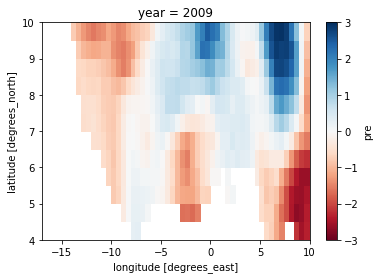

In [285]:
da_RAI.sel(year=2009).plot(vmax=3, cmap='RdBu')

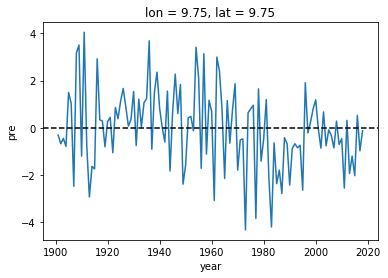

In [271]:
da_RAI.sel(lon=9.5, lat=9.5, method='nearest').plot()
plt.axhline(0, color='k', linestyle='dashed')

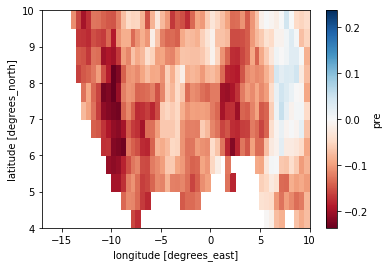

In [286]:
da_RAI.mean('year').plot(cmap='RdBu')

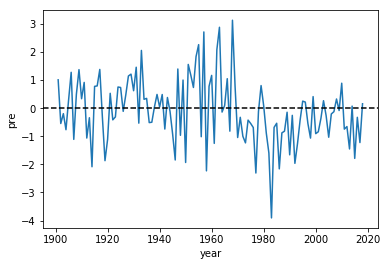

In [287]:
da_RAI.mean(['lon','lat']).plot()
plt.axhline(0, color='k', linestyle='dashed')

END
---